<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/tips_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [23]:
tips=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv")

tips.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [24]:
tips=tips.iloc[:,1:]

tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

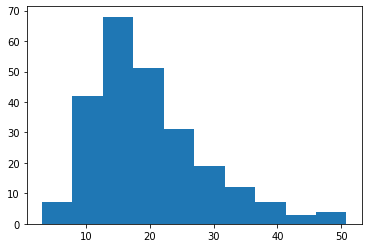

In [25]:
plt.hist(tips.total_bill)

Text(0.5, 1.0, 'total_bill histogram')

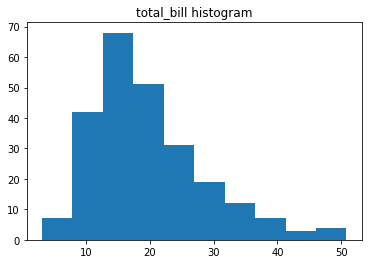

In [26]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)

axes1.hist(tips["total_bill"])
axes1.set_title("total_bill histogram")

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

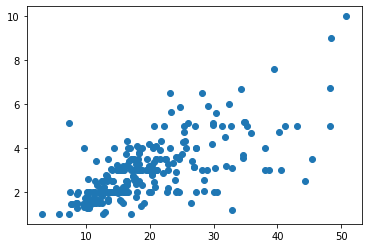

In [27]:
plt.scatter(tips.total_bill, tips.tip)

Text(0.5, 1.0, 'scatter plot between total_bill and tip')

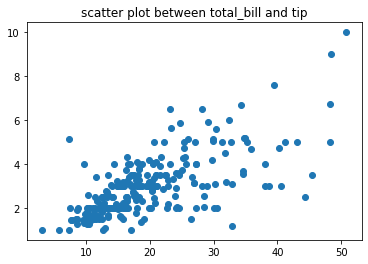

In [28]:
fig=plt.figure()

axes2=fig.add_subplot(1,1,1)

axes2.scatter(tips['total_bill'],tips['tip'])
axes2.set_title('scatter plot between total_bill and tip')

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

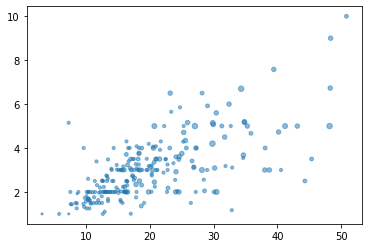

In [32]:
fig=plt.figure()
axes3=fig.add_subplot(1,1,1)

axes3.scatter(tips['total_bill'], tips['tip'], s=tips['size']*5, alpha=0.5)

### Step 8. Present the relationship between days and total_bill value

Text(0.5, 1.0, 'box plot between days and total_bill')

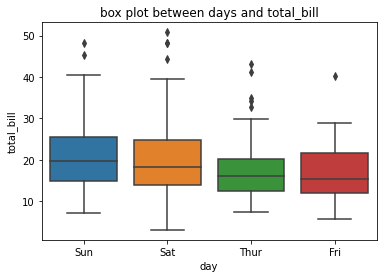

In [42]:
#sns를 섞어서 사용해야하는게 헷갈림
axes4=plt.subplots()
axes4=sns.boxplot(x='day', y='total_bill', data=tips)
axes4.set_title('box plot between days and total_bill')

Text(0.5, 1.0, 'bar plot between days and total_bill')

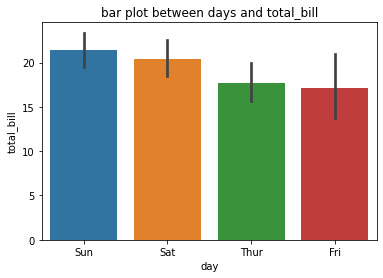

In [43]:
#그냥 plt로 그림 그릴때 처럼 subplot을 설정하고 seaborn을 이용해도 괜찮은 것 같음
fig=plt.figure()
axes5=fig.add_subplot(1,1,1)
axes5=sns.barplot(x='day', y='total_bill', data=tips)
axes5.set_title('bar plot between days and total_bill')

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

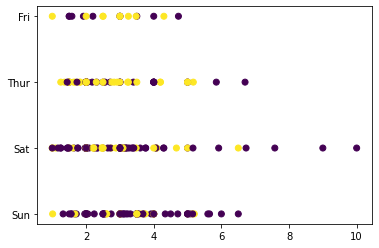

In [47]:
#plt에서 색 인자 c에 boolean 값을 넣어 색을 다르게 표현
fig=plt.figure()
axes6=fig.add_subplot(1,1,1)
axes6.scatter(x='tip', y='day', data=tips, c=tips['sex']=='Female')

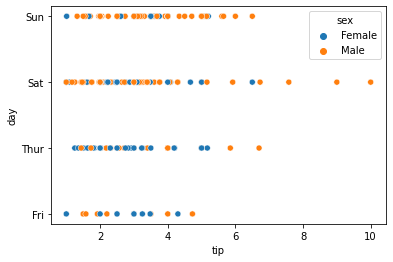

In [53]:
# seaborn에선 scatter이 아니라 scatterplot으로 써주고 색 인자 hue에 바로 범주형 칼럼을 입력 가능
fig=plt.figure()
axes7=fig.add_subplot(1,1,1)
axes7=sns.scatterplot(x='tip', y='day', data=tips, hue='sex')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

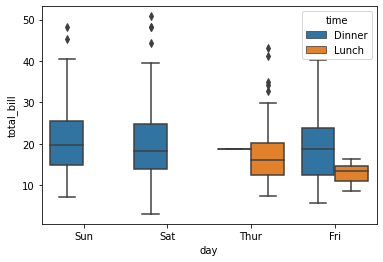

In [54]:
fig=plt.figure()

axes8=fig.add_subplot(1,1,1)
axes8=sns.boxplot(x='day', y='total_bill', data=tips, hue='time')

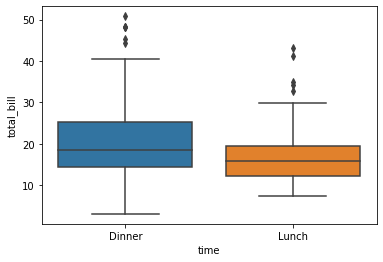

In [57]:
fig=plt.figure()

axes9=fig.add_subplot()
axes9=sns.boxplot(x=tips['time'], y=tips['total_bill'])

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


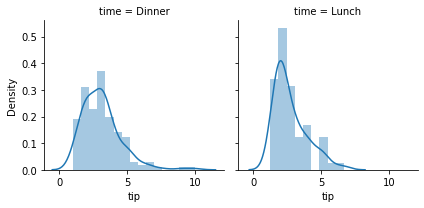

In [74]:
#seaborn의 facet 이용하기
#먼저 sns.FacetGrid로 그룹과 데이터를 지정
#그걸로 .map안에 어떤 그래프를 그리게 할건지 지정

axes10=sns.FacetGrid(tips, col='time')
axes10.map(sns.distplot, 'tip')

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

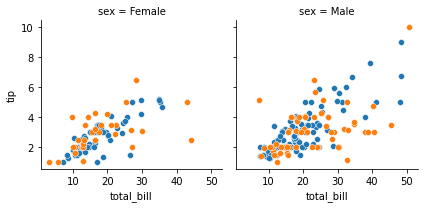

In [77]:
#FacetGrid를 지정할 때 그룹과 색 변수를 지정해주어야 함 .map에서는 지정 불가
axes11=sns.FacetGrid(tips, col='sex', hue='smoker')
axes11.map(sns.scatterplot, 'total_bill', 'tip')

### BONUS: Create your own question and answer it using a graph.